<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы математики для data science. Лекция 2.



**Вектора.**
Загрузим датасет "Hessen House Prices Dataset" из kaggle (https://www.kaggle.com/orgesleka/hessen-house-prices-dataset/downloads/hessen-house-prices-dataset.zip/7). Вектор в данной таблице - это один дом с различными показателями. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
url="http://yustiks.ru/dataset/houses.json"
df=pd.read_json(url)
df.head()

,Aktuell_vermietet,Angebotstyp,Badewanne,Balkon,Barrierefrei,Baujahr,Dachboden,Denkmalobjekt,Dusche,Einbaukueche,Einliegerwohnung,ExactPreis,Gaeste_WC,Garage/Stellplatz,Garten/_mitnutzung,Grundstuecksflaeche__m²_,Haustiere_erlaubt,Haustyp,Heizkosten__in_€_,Heizungsart,Kaution__in_€_,Keller,Moebliert/Teilmoebliert,Nebenkosten__in_€_,Preis,Provision,Terrasse,Verfuegbar_ab_Jahr,Verfuegbar_ab_Monat,Verkaeufer,WG_geeignet,Warmmiete__in_€_,Wohnflaeche__m²_,Zimmer,abtest,adid,elasticSearch,kw,plz,posterid,yo_m,yo_s
0,NaN,Angebot,NaN,NaN,NaN,1928.0,NaN,NaN,NaN,NaN,NaN,270000.0,NaN,NaN,NaN,496.0,NaN,einfamilienhaus,NaN,NaN,NaN,NaN,NaN,NaN,90000.0,ja,NaN,NaN,NaN,gewerblich,NaN,NaN,160,6,control,721918176,VIP_a-default,Ein__bis_Zweifamilienhaus_in_Wiedenbrueck,33378,50316225,A,A
1,NaN,Angebot,true,NaN,NaN,1968.0,NaN,NaN,true,NaN,NaN,590000.0,NaN,true,true,589.0,NaN,mehrfamilienhaus,NaN,zentralheizung,NaN,true,NaN,NaN,90000.0,nein,NaN,NaN,NaN,gewerblich,NaN,NaN,160,8.0,control,723667067,VIP_a-default,Renovierungsbeduerftiges_grosszuegiges_Haus_in...,65207,50379245,A,A
2,NaN,Angebot,NaN,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,NaN,69000.0,NaN,NaN,NaN,75.0,NaN,einfamilienhaus,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,ja,NaN,NaN,NaN,gewerblich,NaN,NaN,120,4,control,709516362,VIP_a-default,Beidseitig_angebautes__schnuckeliges__geraeumi...,54647,40815451,A,A
3,NaN,Angebot,true,NaN,NaN,2017.0,NaN,NaN,true,NaN,NaN,229290.0,true,NaN,NaN,500.0,NaN,einfamilienhaus,NaN,gasheizung,NaN,NaN,true,NaN,90000.0,ja,true,NaN,NaN,gewerblich,NaN,NaN,140,5,control,734728768,VIP_a-default,Das_variable_Familienhaus_mit_Wohlfuehlgarantie,7646,49513983,A,A
4,NaN,Angebot,NaN,NaN,NaN,1900.0,NaN,NaN,NaN,NaN,NaN,99000.0,NaN,true,NaN,1472.0,NaN,einfamilienhaus,NaN,zentralheizung,NaN,NaN,NaN,NaN,90000.0,ja,NaN,NaN,NaN,gewerblich,NaN,NaN,80,4,control,709556588,VIP_a-default,Haus_im_Gruenen,54597,49797192,A,A


Названия параметров здесь даны на немецком языке. 
В целом, каждая колонка несет информацию о доме.
*  Aktuell_vermietet	- текущий съем
*  Angebotstyp	- тип предложения
*  Badewanne	- ванна
*  Balkon	- балкон
*  Barrierefrei	- доступность
*  Baujahr	- в каком году был куплен
*  Dachboden	- чердак
*  Denkmalobjekt	- тип фундамента
*  Dusche - душ
*  Einbaukueche	 - кухня
*  Einliegerwohnung - апартаменты
*  ExactPreis	- стоимость дома (квартиры)
*  Gaeste_WC	- гостевой туалет
*  Garage/Stellplatz	- гараж
*  Garten/_mitnutzung	- сад
*  Grundstuecksflaeche__m²_	- площадь
*  Haustiere_erlaubt	- наличие домашних животных
*  Haustyp	- тип дома
*  Heizkosten__in_€_	- самая высокая цена
*  Heizungsart	- отопление
*  Kaution__in_€_	- депозит
*  Keller	- чердак
*  Moebliert/Teilmoebliert	
*  Nebenkosten__in_€_	- цена на соседние дома
*  Preis	- стоимость
*  Provision	- комиссия
*  Terrasse	- терраса
*  Verfuegbar_ab_Jahr	
*  Verfuegbar_ab_Monat	
*  Verkaeufer	- продавец
*  WG_geeignet	- туалет
*  Warmmiete__in_€_	- стоимость аренды включая отопление
*  Wohnflaeche__m²_	- площадь жилого помещения
*  Zimmer	- комната
*  abtest	
*  adid
*  elasticSearch	
*  kw	- пояснения о доме
*  plz	
*  posterid	- id объявления
*  yo_m	
*  yo_s

У многих домов отсутствует информация. Вектор - это каждый дом (каждый ряд таблицы). Мы можем складывать вектора и вычитать, таким образом, предсказывать цену дома в зависимости от параметров (наличия комнат, размер жилой площади).

In [9]:
len(df.columns)

42

Каждый вектор имеет размер 42. Те вектора, в которых отсутстсвуют параметры (есть значения Nan), должны быть предобработаны, чтобы размерность векторов стала одинаковой. Для наглядности, создадим новую таблицу, куда включим только несколько столбцов: это когда был куплен дом, количество комнат, площадь дома и стоимость дома.

In [21]:
df_1 = df[['Baujahr','Zimmer','Wohnflaeche__m²_','ExactPreis']]
df_1.head()

,Baujahr,Zimmer,Wohnflaeche__m²_,ExactPreis
0,1928.0,6,160,270000.0
1,1968.0,8.0,160,590000.0
2,1750.0,4,120,69000.0
3,2017.0,5,140,229290.0
4,1900.0,4,80,99000.0


Почистим данные от Nan:

In [0]:
df_1 = df_1.dropna()

Колонка Zimmer представлена ввиде строк, ее приведем к типу float:

In [61]:
df_1['Zimmer'] = df_1['Zimmer'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Можно нарисовать в пространстве каждый из домов (отмечены ввиде scatter: точки в 3D пространстве). 

Дома в пространстве 3D от трех параметров: год покупки, площадь дома, цена дома.

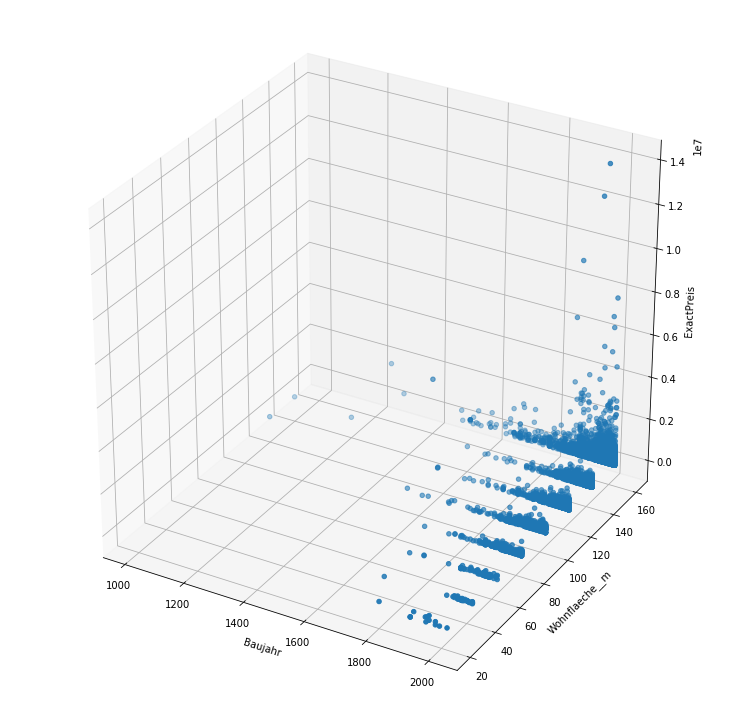

In [70]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['ExactPreis'])

ax.scatter(x, y, z)
ax.set_xlabel('Baujahr')
ax.set_ylabel('Wohnflaeche__m')
ax.set_zlabel('ExactPreis')
plt.show()

По графику например можно сделать вывод, что чем позднее был построен дом, тем выше стоимость дома.

Дома в 3D пространстве от трех параметров: год покупки, площадь территории, комнаты.

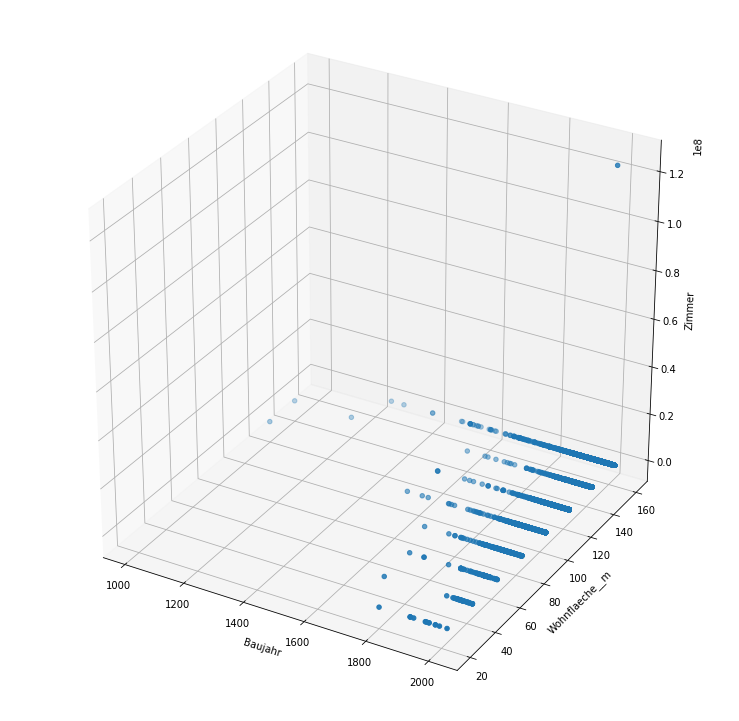

In [74]:
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.scatter(x, y, z)
ax.set_xlabel('Baujahr')
ax.set_ylabel('Wohnflaeche__m')
ax.set_zlabel('Zimmer')
plt.show()

По графику видно, что есть дома со странным показателем количества комнат (верхняя точка). Действительно, странное максимальное значение у вектора z (несущего информацию о количестве комнат):

In [79]:
max(z)

123456789.0

Возьмем все дома, количество комнат в которых меньше 12.

In [0]:
df_1 = df_1[df_1['Zimmer']<12]

In [81]:
max(df_1['Zimmer'])

11.5

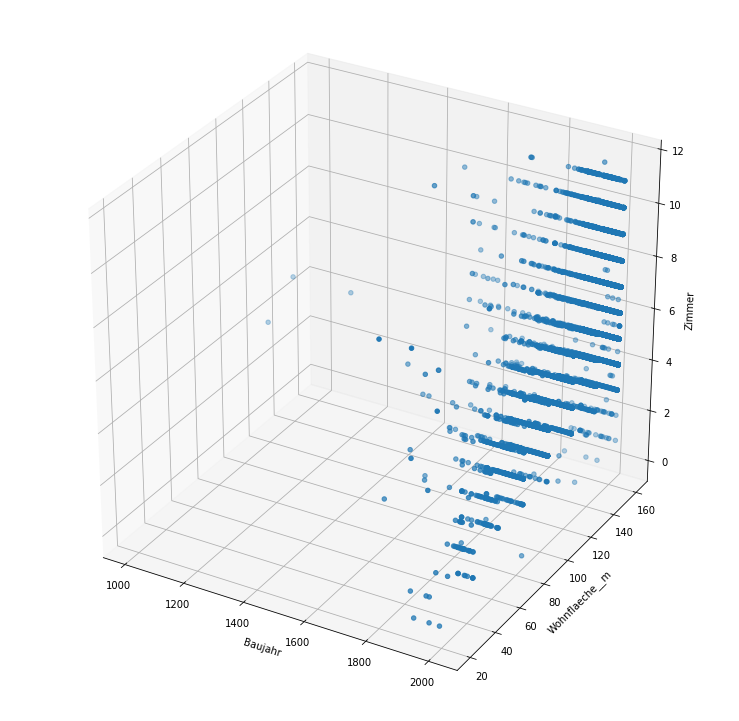

In [82]:
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.scatter(x, y, z)
ax.set_xlabel('Baujahr')
ax.set_ylabel('Wohnflaeche__m')
ax.set_zlabel('Zimmer')
plt.show()

Данный график получился более показателен. Нарисуем несколько векторов в 3D пространстве: возьмем первые 3 дома из таблицы.

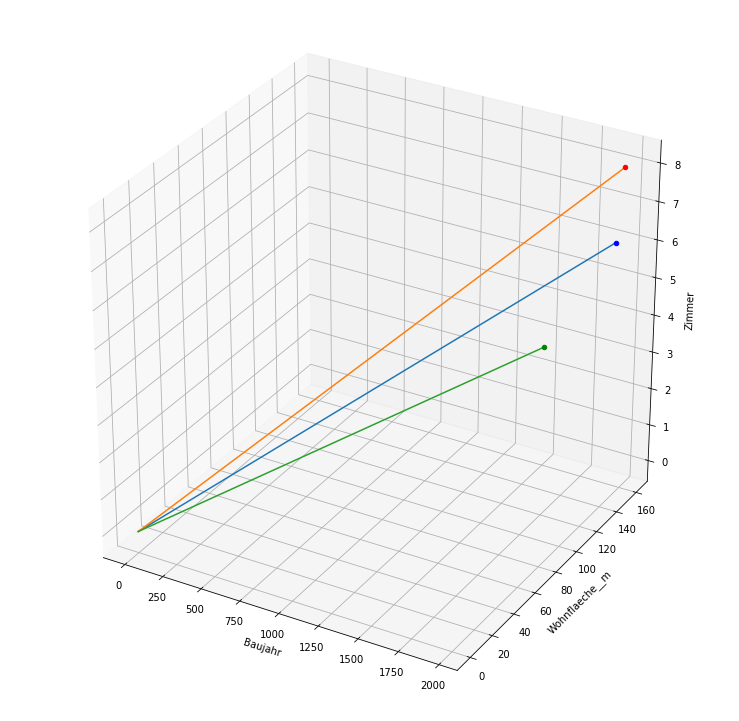

In [91]:
fig = plt.figure(figsize=(13, 13))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('Baujahr')
ax.set_ylabel('Wohnflaeche__m')
ax.set_zlabel('Zimmer')

plt.show()

Можно заметить, что данные дома в выбранном 3D пространстве (год покупки, жилая площадь, количество комнат) расположены недалеко друг от друга.